In [20]:
from brian2 import *

In [21]:
# INFO FROM PAPER
# coupled all to all
# NO refractory period

# QUESTIONS:
# initial conditions? Imean?

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    show()


In [22]:
start_scope()

# Parameters
N     =     128                           # number of neurons
gl    =     0.1   *    msiemens           # conductance of the voltage-independent leak current
Vl    =     -60   *       mV              # reversal potential of the voltage-independent leak current
C     =       1   *       ufarad          # membrane capacitance
tau   =        C / gl / joule             # passive membrane time constant
theta =     -40   *       mV              # membrane potential threshold
tau1  =       3   *       ms              
tau2  =       1   *       ms    
Io    =     0.1   *       mA 

# FOR INITIAL CONDITION 

T = -tau*log((1/(tau*Io)- theta)/(1/(tau*Io) - Vl))
c=1


In [23]:
# tau1 = 3*ms
# tau2 = 1*ms
# t = linspace(0,20,100)*ms
# y=1/(tau1-tau2)*(exp(-t/tau1)-exp(-t/tau2))

# plot(t, y)


In [24]:
# invpeak = 1
# eqs = '''
# dI_syn/dt = (invpeak * s - I_syn) / tau1 : amp
# ds/dt = -s / tau2                        : amp
# '''
# G = NeuronGroup(1, eqs)
# G.s = 1 * amp

# M = StateMonitor(G, 'I_syn', record=True)
# run(20*ms)
# plot(M.t, M.I_syn[0])


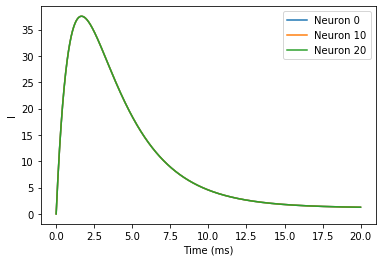

In [25]:
defaultclock.dt = 0.01*ms
mx = log(3) * 3 / 2000 * second
invpeak = 1/(tau1-tau2)*(exp(-mx/tau1)-exp(-mx/tau2)) * second
eqs = '''
dV/dt = (-gl*(V - Vl) + I_syn + Io) / C : volt
'''

syn_eqs = '''
dI_syn/dt = (invpeak * s - I_syn) / tau1     : amp
ds/dt     =  -s /  tau2                      : amp
'''

eqs = Equations(eqs + syn_eqs)

########### NEURONS #######################
G = NeuronGroup(N, eqs, threshold='V > theta', reset='V = Vl', method='exact')

## Init Voltages.
for neu in range (N):
    G.V[neu] = 1/(tau * Io) + (Vl - 1/(tau*Io)) * exp(-c*(neu)*T/(N*tau))
    G.I_syn[neu] = 0

    #print(G.V[neu])

########### SYNAPSES #######################    
S = Synapses(G, G, 'w: amp', on_pre='I_syn += w')

## Connect
S.connect(condition='i!=j')

## Init weight and parameter.
S.w = 0.03 * mA
S.s = 1 * amp


########## VISUALISE ####################### 
par = 'I'
runtime = 20*ms

# State Monitors
MV = StateMonitor(G, 'V', record=True)
MC = StateMonitor(S, 'I_syn', record=True)

# Run.
run(runtime)

# Plotting
for idx in range (3):
    if par == 'V':
        plot(MV.t/ms, MV.V[idx*40], label=('Neuron ' + str(idx*40)))
    if par == 'I':
        plot(MC.t/ms, MC.I_syn[idx*10], label=('Neuron ' + str(idx*10)))

xlabel('Time (ms)')
ylabel(par)
legend();

In [7]:
# visualise_connectivity(S)